In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import tifffile as tf

import sys
sys.path.append( "../2PanalysisUtils" )
#sys.path.append("/home/mursel/DriveNYU/2PanalysisUtils")
import plotconfig as pconf
import matread as mread
import funx_mk as mk
import pandas as pd
import seaborn as sns
import math

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import matplotlib.colors as mlcolors
import matplotlib.cbook as cbook
from matplotlib import cm
%config InlineBackend.figure_format = 'svg'

IMAGES_PATH = Path() / "ResultImgs"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

In [4]:
fieldname = 'M72S50/SC23/220107/BENZ2HA/SC23_220107_BENZ2HA'
mouse1_session = mk.read_session(fieldname)
fieldname2 = 'M72S50/SC24/220110/BENZ2HA/SC24_220110_BENZ2HA'
mouse2_session = mk.read_session(fieldname2)
fieldname3 = 'SC46/220611/BENZ2HA/SC46_220611_BENZ2HA'
mouse3_session = mk.read_session(fieldname3)

Number of Stimulus Types: 8
Number of Trial per Stimulus: 10
Dimensions of single trial array (# time points by # neuron # Trial): (180, 52, 10)
Number of Stimulus Types: 8
Number of Trial per Stimulus: 5
Dimensions of single trial array (# time points by # neuron # Trial): (180, 91, 5)
Number of Stimulus Types: 9
Number of Trial per Stimulus: 10
Dimensions of single trial array (# time points by # neuron # Trial): (180, 131, 10)


Text(0, 0.5, 'dF/F (a.u.)')

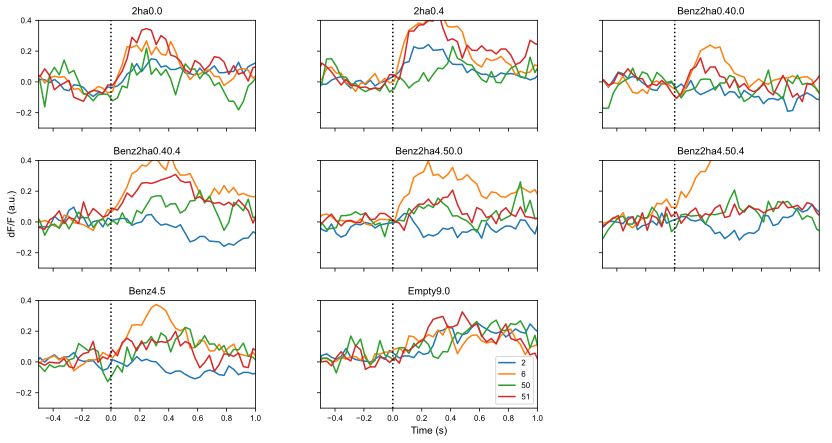

In [5]:
Nrow = 3
nodor = mouse1_session['nodor']
ncell = mouse1_session['ncell']
Ncol = int(math.ceil(nodor/Nrow))
fig, axes = plt.subplots(nrows = Nrow, ncols = Ncol, figsize=[14,7], sharey='row', sharex ='col')
plt.subplots_adjust(wspace = 0.3, hspace=0.3)
ax = axes.flatten('C')
mean_odor_responses = np.zeros([np.size(mouse1_session['odor_responses'][0][:,0,0]),ncell, nodor])

cellid = np.array([2,6,50,51])-1
ncell = np.size(cellid)
colors = plt.cm.rainbow(np.linspace(0, 1, ncell))
taxis = np.linspace(start=-2,stop=4,num=np.shape(mean_odor_responses)[0])
for i,axs in enumerate(ax):
    if i<nodor:
        mean_odor_responses[:,:,i] = np.mean(mouse1_session['odor_responses'][i][:,:,:5], axis=2)
        axs.plot(taxis,np.squeeze(mean_odor_responses[:,cellid,i]),lw=1.5,label =cellid+1)
        axs.set_title(mouse1_session['odor_list'][i])
        axs.vlines(x=0,ymin=-1,ymax=2,color='k',ls=':')
        axs.set_xlim(-0.5,1)
        axs.set_ylim(-0.3,0.4)
    else:
        axs.remove()
    if i==nodor-1:
        axs.legend()
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Time (s)')
plt.ylabel('dF/F (a.u.)')


Text(0, 0.5, 'dF/F (a.u.)')

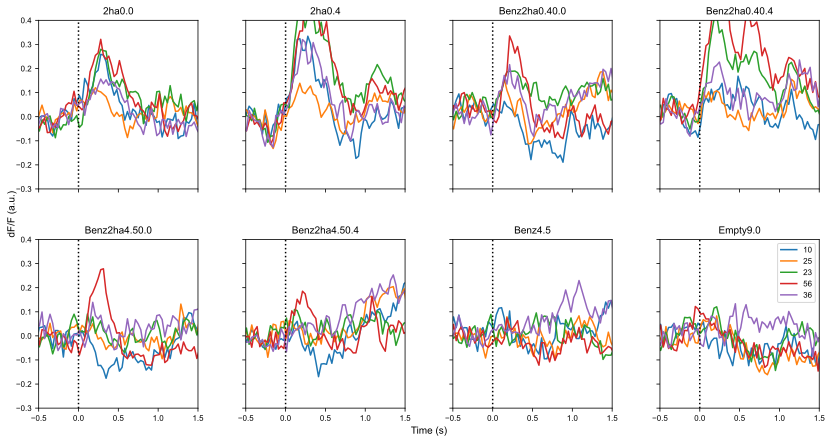

In [6]:
Nrow = 2
nodor = mouse2_session['nodor']
ncell = mouse2_session['ncell']
Ncol = int(math.ceil(nodor/Nrow))
fig, axes = plt.subplots(nrows = Nrow, ncols = Ncol, figsize=[14,7], sharey='row', sharex ='col')
plt.subplots_adjust(wspace = 0.3, hspace=0.3)
ax = axes.flatten('C')
mean_odor_responses = np.zeros([np.size(mouse2_session['odor_responses'][0][:,0,0]),ncell, nodor])

cellid = np.array([10,25,23,56,36])-1
ncell = np.size(cellid)
colors = plt.cm.rainbow(np.linspace(0, 1, ncell))
taxis = np.linspace(start=-2,stop=4,num=np.shape(mean_odor_responses)[0])
for i,axs in enumerate(ax):
    if i<nodor:
        mean_odor_responses[:,:,i] = np.mean(mouse2_session['odor_responses'][i], axis=2)
        axs.plot(taxis,np.squeeze(mean_odor_responses[:,cellid,i]),lw=1.5,label =cellid+1)
        axs.set_title(mouse2_session['odor_list'][i])
        axs.vlines(x=0,ymin=-1,ymax=2,color='k',ls=':')
        axs.set_xlim(-0.5,1.5)
        axs.set_ylim(-0.3,0.4)
    else:
        axs.remove()
    if i==nodor-1:
        axs.legend()
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Time (s)')
plt.ylabel('dF/F (a.u.)')


Text(0, 0.5, 'dF/F (a.u.)')

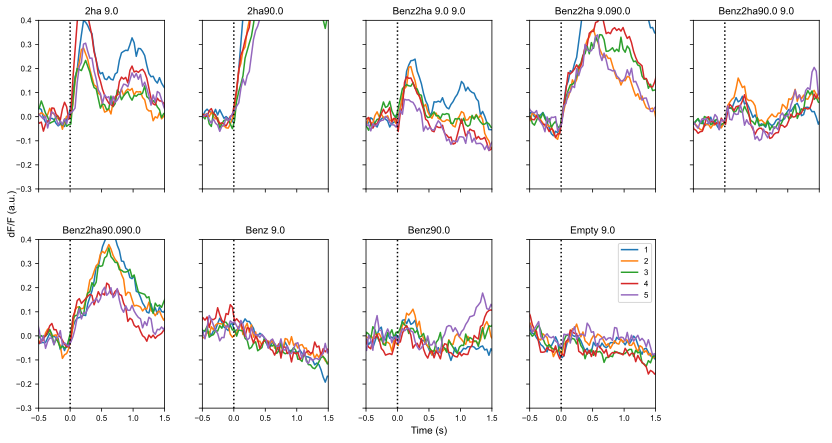

In [7]:
Nrow = 2
nodor = mouse3_session['nodor']
ncell = mouse3_session['ncell']
Ncol = int(math.ceil(nodor/Nrow))
fig, axes = plt.subplots(nrows = Nrow, ncols = Ncol, figsize=[14,7], sharey='row', sharex ='col')
plt.subplots_adjust(wspace = 0.3, hspace=0.3)
ax = axes.flatten('C')
mean_odor_responses = np.zeros([np.size(mouse3_session['odor_responses'][0][:,0,0]),ncell, nodor])

cellid = np.array([1,2,3,4,5])-1
ncell = np.size(cellid)
colors = plt.cm.rainbow(np.linspace(0, 1, ncell))
taxis = np.linspace(start=-2,stop=4,num=np.shape(mean_odor_responses)[0])
for i,axs in enumerate(ax):
    if i<nodor:
        mean_odor_responses[:,:,i] = np.mean(mouse3_session['odor_responses'][i], axis=2)
        axs.plot(taxis,np.squeeze(mean_odor_responses[:,cellid,i]),lw=1.5,label =cellid+1)
        axs.set_title(mouse3_session['odor_list'][i])
        axs.vlines(x=0,ymin=-1,ymax=2,color='k',ls=':')
        axs.set_xlim(-0.5,1.5)
        axs.set_ylim(-0.3,0.4)
    else:
        axs.remove()
    if i==nodor-1:
        axs.legend()
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Time (s)')
plt.ylabel('dF/F (a.u.)')


[0 1 2 3 4]


(-0.2, 1.0)

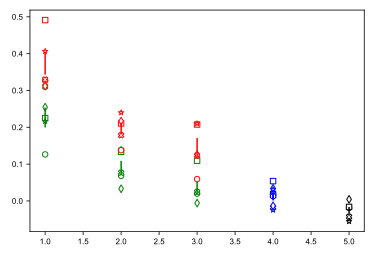

In [8]:
nodor = mouse3_session['nodor']
ncell = mouse3_session['ncell']
Ntime = np.size(mouse3_session['odor_responses'][1],axis=0)
Ntrial = np.size(mouse3_session['odor_responses'][1],axis=2)
stim_responses_stacked = np.zeros([Ntime,ncell,Ntrial,nodor])
for i, odor_res in enumerate(mouse3_session['odor_responses']):
    stim_responses_stacked[:,:,:,i] = odor_res[:,:,:10]
Ncol = int(math.ceil(nodor/Nrow))
cellid = np.array([1,2,3,4,5])-1 ## From MATLAB I got them
print(cellid)
ncell = np.size(cellid)
time_window = np.arange(59,74)
fig = plt.figure(figsize=(6, 4))
markers_= ('o', 's', '*', 'X', 'd', 'H', 'D', 'd', 'P', 'p')
stacked_responses = stim_responses_stacked[59:89,:,:,:]
cell_max = np.max(np.max(np.mean(stacked_responses[:,cellid,:,:],axis=2),axis=2),axis=0)
color_order = ['g','r']*3 + ['b']*2 + ['k']
x_order = np.array([1,1,2,2,3,3,4,4,5])
for i,axs in enumerate(ax):
    if i<nodor:
        mean_odor_responses = np.mean(mouse3_session['odor_responses'][i][:,cellid,:], axis=2)
        mean_responses = np.mean(mean_odor_responses[time_window,:],axis=0)/cell_max
        for k in range(ncell):
            im = plt.scatter(x_order[i],mean_responses[k],s=30,c='w',marker=markers_[k],linewidth=1,alpha=1.0,edgecolors=color_order[i])
        plt.errorbar(x_order[i], np.mean(mean_responses),yerr = np.std(mean_responses)/np.sqrt(ncell),c=color_order[i])
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.ylim(-0.2,1)


[0.33407103 0.1576758  0.45525041 0.55536983 0.32012837]


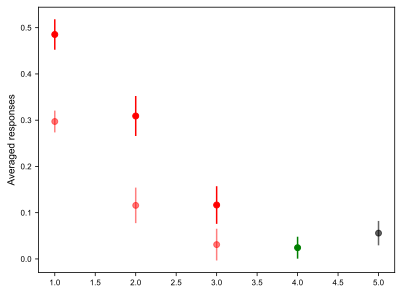

In [9]:
cellid1 = np.array([2,6,51])-1
cellid2 = np.array([10,25,23,56,36])-1 ## From MATLAB I got them
cellid3 = np.array([1,2,3,4,5])-1 ## From MATLAB I got them

cell_mean  = np.zeros([8 , np.size(cellid1)+np.size(cellid2)+np.size(cellid3)])
nodor = mouse1_session['nodor']
ncell = mouse1_session['ncell']
Ntime = np.size(mouse1_session['odor_responses'][1],axis=0)
Ntrial = np.size(mouse1_session['odor_responses'][1],axis=2)
stim_responses_stacked = np.zeros([Ntime,ncell,Ntrial,nodor])
for i, odor_res in enumerate(mouse1_session['odor_responses']):
    stim_responses_stacked[:,:,:,i] = odor_res[:,:,:10]
Ncol = int(math.ceil(nodor/Nrow))
time_window = np.arange(59,74)
stacked_responses = stim_responses_stacked[59:89,:,:,:]
cell_max = np.max(np.max(np.mean(stacked_responses[:,cellid1,:,:],axis=2),axis=2),axis=0)
for i in range(nodor):
    mean_odor_responses = np.mean(mouse1_session['odor_responses'][i][:,cellid1,:], axis=2)
    cell_mean[i,0:3] = np.mean(mean_odor_responses[time_window,:],axis=0)/cell_max

nodor = mouse2_session['nodor']
ncell = mouse2_session['ncell']
Ntime = np.size(mouse2_session['odor_responses'][1],axis=0)
Ntrial = np.size(mouse2_session['odor_responses'][1],axis=2)
stim_responses_stacked = np.zeros([Ntime,ncell,Ntrial,nodor])
for i, odor_res in enumerate(mouse2_session['odor_responses']):
    stim_responses_stacked[:,:,:,i] = odor_res[:,:,:10]
stacked_responses = stim_responses_stacked[59:89,:,:,:]
cell_max = np.max(np.max(np.mean(stacked_responses[:,cellid2,:,:],axis=2),axis=2),axis=0)
print(cell_max)
for i in range(nodor):
    mean_odor_responses = np.mean(mouse2_session['odor_responses'][i][:,cellid2,:], axis=2)
    cell_mean[i,3:8] = np.mean(mean_odor_responses[time_window,:],axis=0)/cell_max

nodor = mouse3_session['nodor']
ncell = mouse3_session['ncell']
Ntime = np.size(mouse3_session['odor_responses'][1],axis=0)
Ntrial = np.size(mouse3_session['odor_responses'][1],axis=2)
stim_responses_stacked = np.zeros([Ntime,ncell,Ntrial,nodor])
for i, odor_res in enumerate(mouse3_session['odor_responses']):
    stim_responses_stacked[:,:,:,i] = odor_res[:,:,:10]
stacked_responses = stim_responses_stacked[59:89,:,:,:]
cell_max = np.max(np.max(np.mean(stacked_responses[:,cellid3,:,:],axis=2),axis=2),axis=0)
for i in range(nodor-1):
    if i<6:
        mean_odor_responses = np.mean(mouse3_session['odor_responses'][i][:,cellid3,:], axis=2)
        cell_mean[i,8:] = np.mean(mean_odor_responses[time_window,:],axis=0)/cell_max
    else:
        mean_odor_responses = np.mean(mouse3_session['odor_responses'][i+1][:,cellid3,:], axis=2)
        cell_mean[i,8:] = np.mean(mean_odor_responses[time_window,:],axis=0)/cell_max
        
x_order = np.array([1,1,2,2,3,3,4,5])
color_order = ['r','r']*3 + ['g'] + ['k']
alpha_order = [0.5, 1.0]*3 + [1.0] + [0.6]
x_order = np.array([1,1,2,2,3,3,4,5])
ncell = np.size(cell_mean,axis=1)
for i in range(np.size(cell_mean,axis=0)):
    plt.errorbar(x_order[i], np.mean(cell_mean[i,:]),yerr = np.std(cell_mean[i,:])/np.sqrt(ncell),c=color_order[i],alpha = alpha_order[i])
    ax = plt.scatter(x_order[i], np.mean(cell_mean[i,:]),c=color_order[i],alpha = alpha_order[i])
plt.ylabel('Averaged responses')
pconf.save_fig("BENZ2HA_modulation",tight_layout=False, Imagespath = IMAGES_PATH)

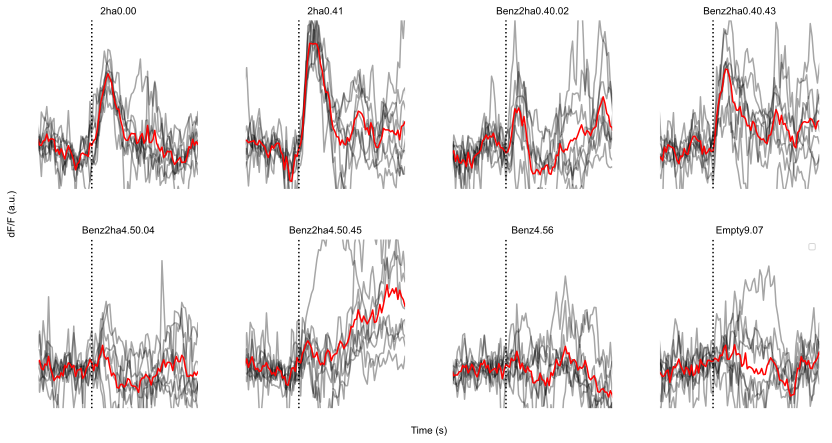

In [10]:
cellid1 = np.array([2,6,51])-1
cellid2 = np.array([10,25,23,56,36])-1 ## From MATLAB I got them
cellid3 = np.array([1,2,3,4,5])-1 ## From MATLAB I got them

cell_mean  = np.zeros([8 , 178, np.size(cellid1)+np.size(cellid2)])
print(np.shape(cell_mean))
nodor = mouse1_session['nodor']
ncell = mouse1_session['ncell']
Ntime = np.size(mouse1_session['odor_responses'][1],axis=0)
Ntrial = np.size(mouse1_session['odor_responses'][1],axis=2)
stim_responses_stacked = np.zeros([Ntime,ncell,Ntrial,nodor])
for i, odor_res in enumerate(mouse1_session['odor_responses']):
    stim_responses_stacked[:,:,:,i] = odor_res[:,:,:10]
time_window = np.arange(59,74)
stacked_responses = stim_responses_stacked[59:74,:,:,:]
cell_max = np.max(np.max(np.mean(stacked_responses[:,cellid1,:,:],axis=2),axis=2),axis=0)
for i in range(nodor):
    mean_odor_responses = np.mean(mouse1_session['odor_responses'][i][:,cellid1,:], axis=2)
    cell_mean[i,:,0:3] =mean_odor_responses[:178,:]/cell_max

    
nodor = mouse2_session['nodor']
ncell = mouse2_session['ncell']
Ntime = np.size(mouse2_session['odor_responses'][1],axis=0)
Ntrial = np.size(mouse2_session['odor_responses'][1],axis=2)
stim_responses_stacked = np.zeros([Ntime,ncell,Ntrial,nodor])
for i, odor_res in enumerate(mouse2_session['odor_responses']):
    stim_responses_stacked[:,:,:,i] = odor_res[:,:,:10]
stacked_responses = stim_responses_stacked[59:74,:,:,:]
cell_max = np.max(np.max(np.mean(stacked_responses[:,cellid2,:,:],axis=2),axis=2),axis=0)
print(cell_max)
for i in range(nodor):
    mean_odor_responses = np.mean(mouse2_session['odor_responses'][i][:,cellid2,:], axis=2)
    cell_mean[i,:,3:8] = mean_odor_responses[:178,:]/cell_max


""" nodor = mouse3_session['nodor']
ncell = mouse3_session['ncell']
Ntime = np.size(mouse3_session['odor_responses'][1],axis=0)
Ntrial = np.size(mouse3_session['odor_responses'][1],axis=2)
stim_responses_stacked = np.zeros([Ntime,ncell,Ntrial,nodor])
for i, odor_res in enumerate(mouse3_session['odor_responses']):
    stim_responses_stacked[:,:,:,i] = odor_res[:,:,:10]
stacked_responses = stim_responses_stacked[59:89,:,:,:]
cell_max = np.max(np.max(np.mean(stacked_responses[:,cellid3,:,:],axis=2),axis=2),axis=0)
for i in range(nodor-1):
    if i<6:
        mean_odor_responses = np.mean(mouse3_session['odor_responses'][i][:,cellid3,:], axis=2)
        cell_mean[i,:,8:] = mean_odor_responses[:178,:]/cell_max
    else:
        mean_odor_responses = np.mean(mouse3_session['odor_responses'][i+1][:,cellid3,:], axis=2)
        cell_mean[i,:,8:] = mean_odor_responses[:178,:]/cell_max  """

Nrow = 2
fig, axes = plt.subplots(nrows = Nrow, ncols = 4, figsize=[14,7], sharey='row', sharex ='col')
plt.subplots_adjust(wspace = 0.3, hspace=0.3)
ax = axes.flatten('C')

taxis = np.linspace(start=-2,stop=4,num=178)
for i,axs in enumerate(ax):
    if i<nodor:
        axs.plot(taxis,np.squeeze(cell_mean[i,:,:]),lw=1.5,c='k', alpha=0.35)
        axs.plot(taxis,np.mean(cell_mean[i,:,:],axis=1),lw=1.5,c='r')
        axs.set_title(mouse1_session['odor_list'][i] + str(i))
        axs.vlines(x=0,ymin=-1,ymax=2,color='k',ls=':')
        axs.set_xlim(-1,2)
        axs.set_ylim(-0.3,1.0)
    else:
        axs.remove()
    if i==nodor-1:
        axs.legend()
        
    axs.set_axis_off()
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Time (s)')
plt.ylabel('dF/F (a.u.)')

pconf.save_fig("BENZ2HA_modulation_cells",tight_layout=False, Imagespath = IMAGES_PATH)

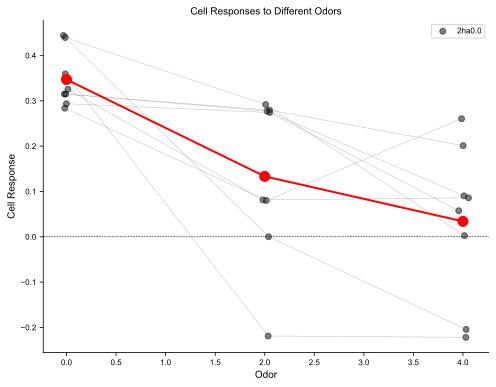

In [11]:
cellid1 = np.array([2,6,51])-1
cellid2 = np.array([10,25,23,56,36])-1 ## From MATLAB I got them

cell_mean  = np.zeros([8 , 178, np.size(cellid1)+np.size(cellid2)])
print(np.shape(cell_mean))
nodor = mouse1_session['nodor']
ncell = mouse1_session['ncell']
Ntime = np.size(mouse1_session['odor_responses'][1],axis=0)
Ntrial = np.size(mouse1_session['odor_responses'][1],axis=2)
stim_responses_stacked = np.zeros([Ntime,ncell,Ntrial,nodor])
for i, odor_res in enumerate(mouse1_session['odor_responses']):
    stim_responses_stacked[:,:,:,i] = odor_res[:,:,:10]
time_window = np.arange(59,74)
stacked_responses = stim_responses_stacked[59:74,:,:,:]
cell_max = np.max(np.max(np.mean(stacked_responses[:,cellid1,:,:],axis=2),axis=2),axis=0)
for i in range(nodor):
    mean_odor_responses = np.mean(mouse1_session['odor_responses'][i][:,cellid1,:], axis=2)
    cell_mean[i,:,0:3] =mean_odor_responses[:178,:]/cell_max

    
nodor = mouse2_session['nodor']
ncell = mouse2_session['ncell']
Ntime = np.size(mouse2_session['odor_responses'][1],axis=0)
Ntrial = np.size(mouse2_session['odor_responses'][1],axis=2)
stim_responses_stacked = np.zeros([Ntime,ncell,Ntrial,nodor])
for i, odor_res in enumerate(mouse2_session['odor_responses']):
    stim_responses_stacked[:,:,:,i] = odor_res[:,:,:10]
stacked_responses = stim_responses_stacked[59:89,:,:,:]
cell_max = np.max(np.max(np.mean(stacked_responses[:,cellid2,:,:],axis=2),axis=2),axis=0)
print(cell_max)
for i in range(nodor):
    mean_odor_responses = np.mean(mouse2_session['odor_responses'][i][:,cellid2,:], axis=2)
    cell_mean[i,:,3:8] = mean_odor_responses[:178,:]/cell_max

cell_mean_odor = np.mean(cell_mean[:,59:74,:],axis=1)


plt.figure(figsize=(8, 6))

odor_indices = [0, 2, 4]
x_positions = []
mean_responses = []

for idx, i in enumerate(odor_indices):
    # Calculate x positions with jitter
    x_pos = np.ones(8) * i + np.random.randn(8) * 0.03
    x_positions.append(x_pos)
    
    # Scatter plot of individual cells
    plt.scatter(x_pos, cell_mean_odor[i, :], 
                color='k',
                alpha=0.5,
                label=f"{mouse1_session['odor_list'][i]}" if idx == 0 else "")
    
    # Calculate and store mean response
    mean_response = np.mean(cell_mean_odor[i, :])
    mean_responses.append(mean_response)
    
    # Add mean response as a larger point
    plt.scatter(i, mean_response, 
                color='red', 
                s=100, 
                marker='o',
                zorder=3)  # Ensure mean points are on top

# Connect same cells across odors with lines
for cell in range(8):
    plt.plot([x_positions[0][cell], x_positions[1][cell], x_positions[2][cell]],
             [cell_mean_odor[0, cell], cell_mean_odor[2, cell], cell_mean_odor[4, cell]],
             color='gray', alpha=0.5, linestyle='-', linewidth=0.5)

# Connect mean responses with a line
plt.plot(odor_indices, mean_responses, color='red', linestyle='-', linewidth=2, zorder=2)

plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
sns.despine()

plt.xlabel('Odor')
plt.ylabel('Cell Response')
plt.title('Cell Responses to Different Odors')
plt.legend()
pconf.save_fig("BENZ2HA_modulation_cells_mean",tight_layout=False, Imagespath = IMAGES_PATH)

In [12]:
np.shape(cell_mean)

(8, 178, 8)

In [13]:
import scipy.stats as stats

a1 = np.mean(cell_mean[0,59:75,:],axis=0)
a2 = np.mean(cell_mean[2,59:75,:],axis=0)
a3 = np.mean(cell_mean[4,59:75,:],axis=0)
a4 = np.mean(cell_mean[7,59:75,:],axis=0)

Results = stats.ttest_rel(a1,a2,alternative='greater')
print(f"cellid={i:.0f} Ttest for a1 and a2: pvalue={Results.pvalue:.10f}")
print(f"cellid={i:.0f} Ttest for a1 and a2: statistic={Results.statistic:.5f}")
print(" ")

Results = stats.ttest_rel(a1,a3,alternative='greater')
print(f"cellid={i:.0f} Ttest for a1 and a3: pvalue={Results.pvalue:.10f}")
print(f"cellid={i:.0f} Ttest for a1 and a3: statistic={Results.statistic:.5f}")
print(" ")
Results = stats.ttest_rel(a2,a3,alternative='greater')
print(f"cellid={i:.0f} Ttest for a2 and a3: pvalue={Results.pvalue:.10f}")
print(f"cellid={i:.0f} Ttest for a2 and a3: statistic={Results.statistic:.5f}")

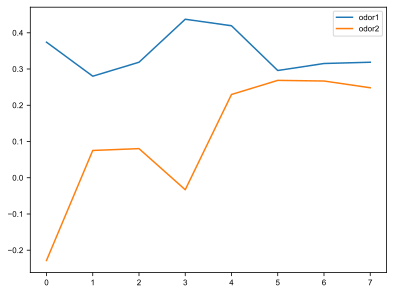

In [14]:
plt.plot(a1, label='odor1')
plt.plot(a2, label='odor2')
plt.legend()

In [15]:
import scipy.stats as stats

for i in range(8):
    a1 = cell_mean[0,59:90,i]
    a2 = cell_mean[2,59:90,i]
    a3 = cell_mean[4,59:90,i]
    a4 = cell_mean[7,59:90,i]

    Results = stats.ttest_rel(a1,a2,alternative='greater')
    print(f"cellid={i:.0f} Ttest for a1 and a2: statistic={Results.pvalue:.4f}")
print(" ")
for i in range(8):
    a1 = cell_mean[0,59:90,i]
    a3 = cell_mean[4,59:90,i]

    Results = stats.wilcoxon(a1,a3,alternative='greater')
    print(f"cellid={i:.0f} Ttest for a1 and a3: statistic={Results.pvalue:.4f}")
print(" ")
for i in range(8):
    a1 = cell_mean[0,59:90,i]
    a4 = cell_mean[7,59:90,i]

    Results = stats.ttest_rel(a1,a4,alternative='greater')
    print(f"cellid={i:.0f} Ttest for a1 and a4: statistic={Results.pvalue:.4f}")
print(" ")
for i in range(8):
    a2 = cell_mean[2,59:90,i]
    a3 = cell_mean[4,59:90,i]

    Results = stats.ttest_rel(a2,a3,alternative='greater')
    print(f"cellid={i:.0f} Ttest for a2 and a3: statistic={Results.pvalue:.4f}")
print(" ")
for i in range(8):
    a3 = cell_mean[4,59:90,i]
    a4 = cell_mean[7,59:90,i]

    Results = stats.ttest_rel(a3,a4,alternative='two-sided')
    print(f"cellid={i:.0f} Ttest for a3 and a4: statistic={Results.pvalue:.4f}")

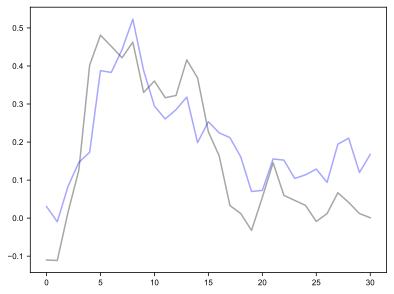

In [16]:
plt.plot(np.squeeze(cell_mean[0,59:90,1]),lw=1.5,c='k', alpha=0.35)
plt.plot(np.squeeze(cell_mean[4,59:90,1]),lw=1.5,c='b', alpha=0.35)

(-0.2, 1.0)

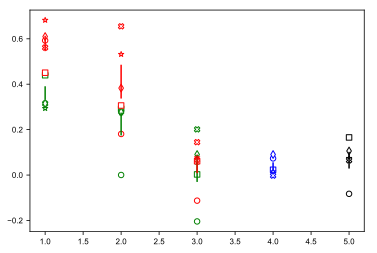

In [17]:
nodor = mouse2_session['nodor']
ncell = mouse2_session['ncell']
Ntime = np.size(mouse2_session['odor_responses'][1],axis=0)
Ntrial = np.size(mouse2_session['odor_responses'][1],axis=2)
stim_responses_stacked = np.zeros([Ntime,ncell,Ntrial,nodor])
for i, odor_res in enumerate(mouse2_session['odor_responses']):
    stim_responses_stacked[:,:,:,i] = odor_res[:,:,:10]
Ncol = int(math.ceil(nodor/Nrow))
cellid = np.array([10,25,23,56,36])-1 ## From MATLAB I got them
print(cellid)
ncell = np.size(cellid)
time_window = np.arange(59,74)
fig = plt.figure(figsize=(6, 4))
markers_= ('o', 's', '*', 'X', 'd', 'H', 'D', 'd', 'P', 'p')
stacked_responses = stim_responses_stacked[59:89,:,:,:]
cell_max = np.max(np.max(np.mean(stacked_responses[:,cellid,:,:],axis=2),axis=2),axis=0)
color_order = ['g','r']*3 + ['b'] + ['k']
x_order = np.array([1,1,2,2,3,3,4,5])
for i,axs in enumerate(ax):
    if i<nodor:
        mean_odor_responses = np.mean(mouse2_session['odor_responses'][i][:,cellid,:], axis=2)
        mean_responses = np.mean(mean_odor_responses[time_window,:],axis=0)/cell_max
        for k in range(ncell):
            im = plt.scatter(x_order[i],mean_responses[k],s=30,c='w',marker=markers_[k],linewidth=1,alpha=1.0,edgecolors=color_order[i])
        plt.errorbar(x_order[i], np.mean(mean_responses),yerr = np.std(mean_responses)/np.sqrt(ncell),c=color_order[i])
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.ylim(-0.2,1)


(-0.2, 1.0)

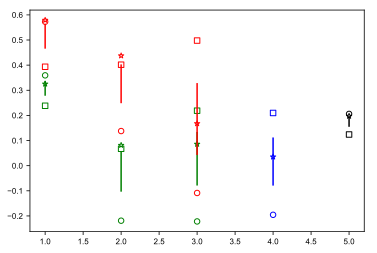

In [18]:
nodor = mouse1_session['nodor']
ncell = mouse1_session['ncell']
Ntime = np.size(mouse1_session['odor_responses'][1],axis=0)
Ntrial = np.size(mouse1_session['odor_responses'][1],axis=2)
stim_responses_stacked = np.zeros([Ntime,ncell,Ntrial,nodor])
for i, odor_res in enumerate(mouse1_session['odor_responses']):
    stim_responses_stacked[:,:,:,i] = odor_res[:,:,:10]
Ncol = int(math.ceil(nodor/Nrow))
cellid = np.array([2,6,51])-1 ## From MATLAB I got them
print(cellid)
ncell = np.size(cellid)
time_window = np.arange(59,74)
fig = plt.figure(figsize=(6, 4))
markers_= ('o', 's', '*', 'X', 'd', 'H', 'D', 'd', 'P', 'p')
stacked_responses = stim_responses_stacked[59:89,:,:,:]
cell_max = np.max(np.max(np.mean(stacked_responses[:,cellid,:,:],axis=2),axis=2),axis=0)
color_order = ['g','r']*3 + ['b'] + ['k']
x_order = np.array([1,1,2,2,3,3,4,5])
for i,axs in enumerate(ax):
    if i<nodor:
        mean_odor_responses = np.mean(mouse1_session['odor_responses'][i][:,cellid,:], axis=2)
        mean_responses = np.mean(mean_odor_responses[time_window,:],axis=0)/cell_max
        for k in range(ncell):
            im = plt.scatter(x_order[i],mean_responses[k],s=30,c='w',marker=markers_[k],linewidth=1,alpha=1.0,edgecolors=color_order[i])
        plt.errorbar(x_order[i], np.mean(mean_responses),yerr = np.std(mean_responses)/np.sqrt(ncell),c=color_order[i])
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.ylim(-0.2,1)


In [19]:
fieldname = 'M72S50/SC24/220110/BENZ2HAGlom/SC24_220110_BENZ2HAglom'
glom_sess= mk.read_session(fieldname )

In [20]:
df_responses_stat = mk.calc_onset_time(glom_sess['odor_responses'],glom_sess['odor_list'], threshold1 = 6, threshold2 =6.0)


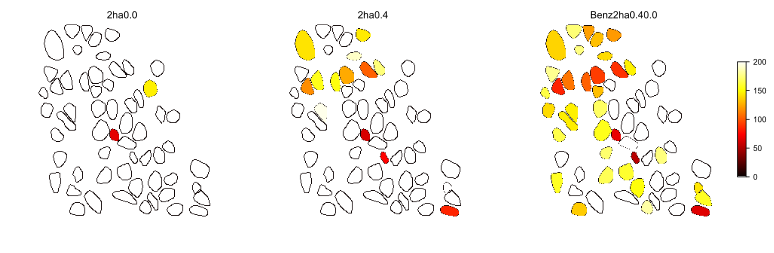

In [21]:
unique_odor = df_responses_stat['odor_val'].unique()

def mask_edge_detection2(cell_masks):
    img_ = np.reshape(np.dot(cell_masks>0,np.ones([ncell])),[256,256]).T
    img = np.uint8(img_)
    edges = cv2.Canny(img,0,1)
    return edges

def mask_edge_detection(cell_masks):
    ncell = np.size(cell_masks,axis=1)
    edges = np.zeros([256,256,ncell])
    for i in range(ncell):
        img_ = np.reshape((cell_masks[:,i]>0),[256,256]).T
        img = np.uint8(img_)
        edges[:,:,i] = cv2.Canny(img,0,1)   
    return np.mean(edges,axis=2)
Nrow = 4
nodor = glom_sess['nodor']
ncell = glom_sess['ncell']
Ncol = int(math.ceil(nodor/Nrow))
cellid = np.arange(0,ncell)

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=[12,4], sharey='row', sharex ='col')
plt.subplots_adjust(wspace = 0.3, hspace=0.3)
ax = axs.flatten('F')
time_window = np.arange(59,89)
cell_masks = glom_sess['cell_mask']
edges = mask_edge_detection(cell_masks)
od_plot = [0,2,4]

for i,odorval in enumerate(od_plot):
    lats =np.zeros([ncell,])
    lat = df_responses_stat.loc[lambda df_responses_stat: (df_responses_stat['odor_val'] == unique_odor[odorval] ) & (df_responses_stat['response_sign'] == 1)] 
    lats[lat['roi_id']-1] = lat['latencies'].to_numpy()
    img = np.reshape(np.dot(cell_masks,np.divide(lats,np.max(cell_masks,axis=0))),[256,256]).T
    imgplot = img  + edges/255
    imgplot[imgplot ==0] = np.nan
    im = ax[i].imshow(imgplot,cmap='hot',interpolation='none',aspect='equal',vmin=0,vmax=200)
    ax[i].set_title(glom_sess['odor_list'][i])
    ax[i].axis('off')
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
fig.subplots_adjust(right=0.93)
cbar_ax = fig.add_axes([0.95, 0.3, 0.01, 0.4])
fig.colorbar(im, cax=cbar_ax)

pconf.save_fig("BENZ2HAGlom_SC24_220110",tight_layout=False, Imagespath = IMAGES_PATH)

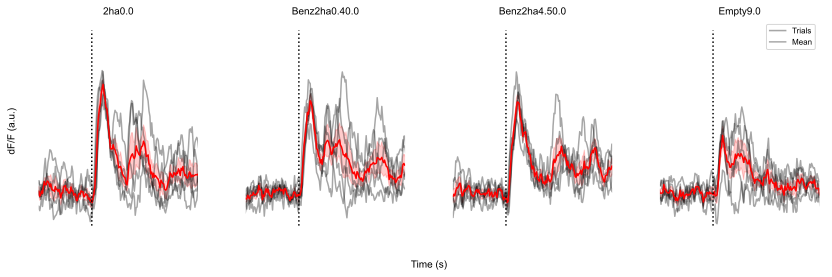

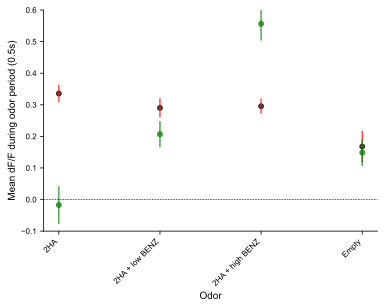

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Nrow = 1
fig, axes = plt.subplots(nrows=Nrow, ncols=4, figsize=[14, 4], sharey='row', sharex='col')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
ax = axes.flatten('C')
taxis = np.linspace(start=-2, stop=4, num=348)
od_plot = [0, 2, 4, 7]
nodor = len(od_plot)  # Assuming nodor is the number of odors to plot

# List to store cell_response_od_period for each odor
od_period_responses = []
od_period_responses_all = []
for i, axs in enumerate(ax):
    if i < nodor:
        cell_response = glom_sess['odor_responses'][od_plot[i]]
        cell_response_od_period = np.mean(cell_response[115:115+29, 0, :], axis=0)
        mean_response = np.mean(cell_response[:, 0, :], axis=1)
        sem_response = stats.sem(cell_response[:, 0, :], axis=1)
        axs.plot(taxis, np.squeeze(cell_response[:, 0, :]), lw=1.5, c='k', alpha=0.35)
        axs.plot(taxis, mean_response, lw=1.5, c='r')
        axs.fill_between(taxis, mean_response - sem_response, mean_response + sem_response, color='r', alpha=0.2)
        axs.set_title(glom_sess['odor_list'][od_plot[i]])
        axs.vlines(x=0, ymin=-0.2, ymax=1.0, color='k', ls=':')
        axs.set_xlim(-1, 2)
        
        # Store the odor period response
        cell_response_od_period2 = np.mean(np.mean(cell_response[115:115+29, :, :], axis=0),axis=0)
        od_period_responses.append(cell_response_od_period)
        od_period_responses_all.append(cell_response_od_period2)
    else:
        axs.remove()
    if i == nodor - 1:
        axs.legend(['Trials', 'Mean'])
        
    axs.set_axis_off()

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Time (s)')
plt.ylabel('dF/F (a.u.)')

fig2, axes2 = plt.subplots(nrows=1, ncols=1, figsize=[6, 4])

# Define odor labels
odor_labels = ['2HA', '2HA + low BENZ', '2HA + high BENZ', 'Empty']  # Placeholder for 4th odor

for i, od_res in enumerate(od_period_responses):
    axes2.plot(i, np.mean(od_res), 'o', alpha=0.7, c='k', markersize=5)
    axes2.errorbar(i, np.mean(od_res), yerr=np.std(od_res)/np.sqrt(len(od_res)), c='r', alpha=0.7, markersize=5)

    axes2.plot(i, np.mean(od_period_responses_all[i]), 'o', alpha=0.7, c='g', markersize=5)
    axes2.errorbar(i, np.mean(od_period_responses_all[i]), yerr=np.std(od_period_responses_all[i])/np.sqrt(len(od_period_responses_all[i])), c='g', alpha=0.7, markersize=5)
axes2.axhline(y=0, color='k', linestyle='--', linewidth=0.5)

axes2.set_ylim(-0.1, 0.6)
axes2.set_xticks(range(nodor))
axes2.set_xticklabels(odor_labels[:nodor], rotation=45, ha='right')
axes2.set_ylabel('Mean dF/F during odor period (0.5s)')
axes2.set_xlabel('Odor')
sns.despine()

# Statistical comparison: Is 2HA higher than other odors?
stats_output = ["Statistical comparison (one-sided t-test, 2HA vs. others, Bonferroni-corrected alpha = 0.0167):"]
try:
    alpha = 0.05 / 3  # Bonferroni correction for 3 comparisons
    for i, label in enumerate(odor_labels[1:], 1):
        t_stat, p_value = stats.ttest_ind(od_period_responses[0], od_period_responses[i], alternative='greater')
        p_corrected = min(p_value * 3, 1.0)  # Apply Bonferroni correction, cap at 1.0
        mean_2ha = np.mean(od_period_responses[0])
        mean_other = np.mean(od_period_responses[i])
        result = (f"2HA vs. {label}: t = {t_stat:.3f}, p = {p_value:.4f} (corrected p = {p_corrected:.4f}), "
                  f"Mean 2HA = {mean_2ha:.3f}, Mean {label} = {mean_other:.3f}")
        if p_corrected < 0.05:
            result += f"\n  -> Significant: 2HA responses are higher than {label}"
        else:
            result += f"\n  -> Not significant: No evidence 2HA responses are higher than {label}"
        stats_output.append(result)
except Exception as e:
    stats_output.append(f"Error in statistical comparison: {str(e)}")

# Alternative 2: Display statistical results in fig2 as a text box
stats_text = "\n".join(stats_output)
print(stats_text)
#axes2.text(0.05, 0.4, stats_text, transform=axes2.transAxes, fontsize=8,
#           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


In [23]:
cell_response_od_period = np.mean(cell_response[116:146,0,:],axis=0)
cell_response_od_period

array([-0.0330738 ,  0.21678981,  0.13821445,  0.27290748,  0.29309487])

In [24]:
import scipy.stats as stats
od1 =np.mean(glom_sess['odor_responses'][0][118:148,0,:],axis=0)
od2 =np.mean(glom_sess['odor_responses'][2][118:148,0,:],axis=0)
od3 =np.mean(glom_sess['odor_responses'][4][118:148,0,:],axis=0)
od4 =np.mean(glom_sess['odor_responses'][7][118:148,0,:],axis=0)


Results = stats.ttest_rel(od1,od2,alternative='greater')
print(f"cellid={i:.0f} Ttest for od1 and od2: p-value={Results.pvalue:.4f}")
print(f"cellid={i:.0f} Ttest for od1 and od2: statistic={Results.statistic:.5f}")
print(" ")
Results = stats.ttest_rel(od1,od3,alternative='greater')
print(f"cellid={i:.0f} Ttest for od1 and od3: p-value={Results.pvalue:.4f}")
print(f"cellid={i:.0f} Ttest for od1 and od3: statistic={Results.statistic:.5f}")
Results = stats.ttest_rel(od2,od3,alternative='greater')
print(f"cellid={i:.0f} Ttest for od2 and od3: p-value={Results.pvalue:.4f}")
print(f"cellid={i:.0f} Ttest for od2 and od3: statistic={Results.statistic:.5f}")

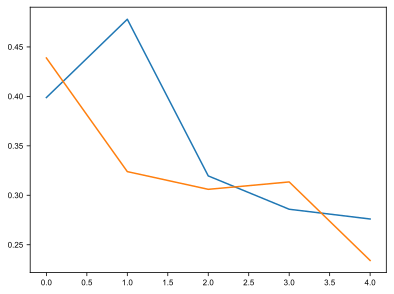

In [25]:
plt.plot(od1)
plt.plot(od2)